<a href="https://colab.research.google.com/github/efraAI/academic_unal/blob/main/Actividad_8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![nacho](https://drive.google.com/uc?export=view&id=1iRdviyR7fZF9czd0IRbeNr4MX2NEWmp7)

# **Actividad 08**
## **Optimización y redes neuronales**
Decisiones bajo incertidumbre (Optimización para aprendizaje de máquina)


### Autores:
* Daniel Felipe Pérez Grajales 1'152.435.277 . dfperezg@unal.edu.co
* Efraín Galvis Amaya 1'152.193.093 . efgalvisa@unal.edu.co<br><br>

### Profesor:
Juan David Ospina Arango<br><br>

---
*Universidad Nacional de Colombia - Sede Medellín*<br>
*Departamento de Ciencias de la Computación y de la Decisión*<br>
*Decisiones bajo incertidumbre (Optimización para aprendizaje de máquina)*<br>

---



##**Optimización y redes neuronales**

El objetivo de esta actividad es afianzar los conocimientos de optimización numérica y su importancia en el entrenamiento de modelos de aprendizaje de máquina. Para ello se considera el tutorial de reconocimiento de dígitos con el conjunto de datos MNIST de la Guia inicial de TensorFlow 2.0 para principiantes. El conjunto de entrenamiento contiene 60,000 imágenes de entrenamiento y 10,000 imágenes de validación.

# **Actividades**
## 1. Reproduzca el tutorial citado completándolo con la fórmula matemática de la función de pérdida.

El propósito de las funciones de pérdida es calcular y minimizar los errores de predicción que un modelo tiene durante el proceso de entrenamiento. Existes dos vertientes de funciones de pérdida y su diferencia radicará en el tipo de problema que el modelo busque resolver: problema de clasificación o de regresión. Para este ejercicio de clasificación planteado, se resolverá con funciones de pérdida probabilísticas, puntualmente *CategoricalCrossentropy*. 

Este tipo de funciones, busca calcular la pérdida de entropía cruzada entre las etiquetas y las predicciones. Este método se usa cuando existen dos o más clases de etiquetas. Si desea proporcionar etiquetas como números enteros, se debe utilizar la SparseCategoricalCrossentropypérdida. 

<br>
Formula matemática de la funcion de pérdida probabilística:

![formula_lossfunction](https://drive.google.com/uc?export=view&id=1_I4STGA-OouqJ-gRY-vGyzd4XjfaAcsD)


**CategoricalCrossentropy:** 

tf.keras.losses.CategoricalCrossentropy(from_logits=False, label_smoothing=0, axis=-1, reduction="auto",   name="categorical_crossentropy")

**SparseCategoricalCrossentropy:**

tf.keras.losses.SparseCategoricalCrossentropy()



---

https://keras.io/api/losses/

---



## 2. Optimización por

* SGD
* RSMprop
* Adagram
* Adadelta

En cada caso varíe la tasa de aprendizaje η = 0.001, 0.1, 0.5, 0.9, 1.5 manteniendo los otros parámetros del optimizador en sus valores por defecto

2.1 Import libraries

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import random as rnd
import matplotlib.pyplot as plt
import seaborn as sns

2.2 Get data

Dimensiones de x_train:  (60000, 28, 28) 



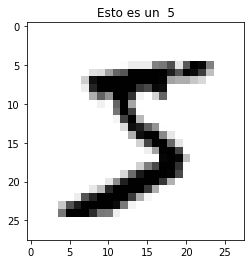

In [ ]:
# Lectura del conjunto de datos MNIST:
mnist = tf.keras.datasets.mnist # Crea un alias

(x_train, y_train), (x_test, y_test) = mnist.load_data() # Carga los datos que están en uint8
x_train, x_test = x_train / 255.0, x_test / 255.0 # Vuelve los valores de intensidad números flotantes

print('Dimensiones de x_train: ',x_train.shape, '\n')

i = 0
plt.figure()
plt.imshow(x_train[i],cmap=plt.cm.binary)
plt.title(f"Esto es un  {y_train[i]}")
plt.grid(False)
plt.show()

2.3 Visualize data

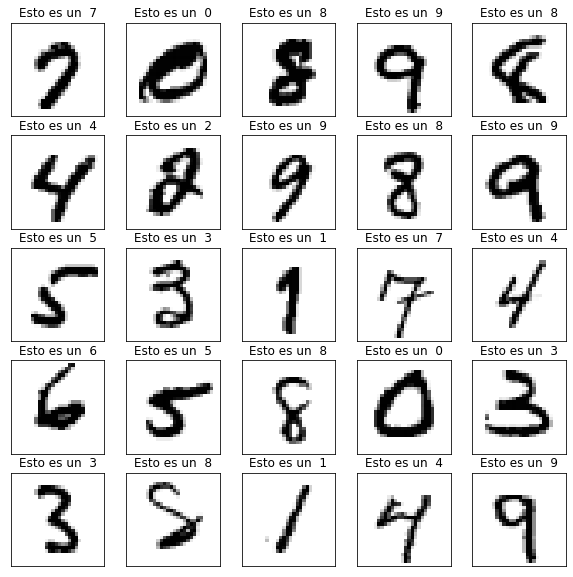

In [ ]:
rnd.seed(1)
index = rnd.sample(range(len(y_train)),k=25)
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[index[i]], cmap=plt.cm.binary)
    plt.title(f"Esto es un  {y_train[index[i]]}")
plt.show()

Se defininen las siguientes tasas de aprendizaje junto a los siguientes optimizadores para el ejercicio :

η = [0.001, 0.1, 0.5, 0.9, 1.5]

op = ['SGD', 'RMSprop', 'Adagrad', 'Adadelta', 'Adam']

Se plantea un bucle, con las distintas combinaciones de tasas de aprendizaje junto a las diferentes optimizadores con el fin de tener un proceso mas automático.


2.4 Create optimización loop to train the neural net

In [ ]:
learning_rates = [0.001, 0.1, 0.5, 0.9, 1.5]
optimizers = ['SGD', 'RMSprop', 'Adagrad', 'Adadelta', 'Adam']

SGD_train = []
RMSprop_train = []
Adagrad_train = []
Adadelta_train = []
Adam_train = []
SGD_val = []
RMSprop_val = []
Adagrad_val = []
Adadelta_val = []
Adam_val = []

for my_optimizer in optimizers:
  for my_lr in learning_rates:
    model = tf.keras.models.Sequential([
      tf.keras.layers.Flatten(input_shape=(28, 28)),
      tf.keras.layers.Dense(128, activation='relu'),
      tf.keras.layers.Dropout(0.2),
      tf.keras.layers.Dense(10, activation='softmax')
    ])
    
    str_opt = "tf.keras.optimizers.{}(learning_rate={})".format(my_optimizer, my_lr)
    opt = eval(str_opt)
    model.compile(optimizer=opt,
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    model.fit(x_train, y_train, epochs=5)

    arr_str_t = "{}_train.append(model.history.history['accuracy'][-1])".format(my_optimizer)
    eval(arr_str_t)

    arr_str_v = "{}_val.append(model.evaluate(x_test,  y_test, verbose=2)[1])".format(my_optimizer)
    eval(arr_str_v)

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 1.7690 - accuracy: 0.4875
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 1.0416 - accuracy: 0.7484
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.7779 - accuracy: 0.8010
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.6583 - accuracy: 0.8231
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5880 - accuracy: 0.8376
313/313 - 1s - loss: 0.4805 - accuracy: 0.8813
Epoch 1/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3325 - accuracy: 0.9032
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1703 - accuracy: 0.9510
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1305 - accuracy: 0.9621
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1118 - accuracy: 0.9668
Epoch 5/5
1875/1875 [=======================

## 3. Reporte las gráficas de la función de pérdida y del accuracy durante el proceso de optimización.


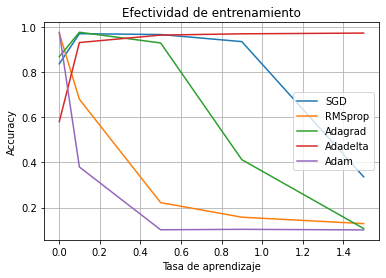

,Tasa de apredizaje,Accuracy
0,0.001,0.581100
1,0.100,0.931917
2,0.500,0.965050
3,0.900,0.970683
4,1.500,0.973967


In [ ]:
plt.plot(learning_rates, SGD_train, label = "SGD")
plt.plot(learning_rates, RMSprop_train, label = "RMSprop")
plt.plot(learning_rates, Adagrad_train, label = "Adagrad")
plt.plot(learning_rates, Adadelta_train, label = "Adadelta")
plt.plot(learning_rates, Adam_train, label = "Adam")
plt.xlabel("Tasa de aprendizaje")
plt.ylabel("Accuracy")
plt.title("Efectividad de entrenamiento")
plt.grid()
plt.legend()
plt.show()
pd.DataFrame({'Tasa de apredizaje':learning_rates, 'Accuracy':Adadelta_train})


Se observa que dentro del dataset de entrenamiento se tiene que el mejor optimizador es 'Adadelta', dado que tiene un desempeño creciente en acurracy.

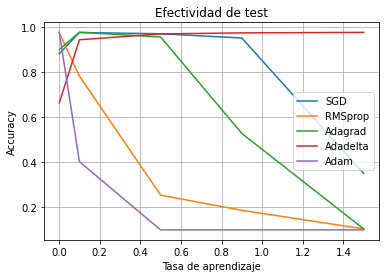

,Tasa de apredizaje,Accuracy
0,0.001,0.6634
1,0.100,0.9434
2,0.500,0.9695
3,0.900,0.9741
4,1.500,0.9763


In [ ]:
plt.plot(learning_rates, SGD_val, label = "SGD")
plt.plot(learning_rates, RMSprop_val, label = "RMSprop")
plt.plot(learning_rates, Adagrad_val, label = "Adagrad")
plt.plot(learning_rates, Adadelta_val, label = "Adadelta")
plt.plot(learning_rates, Adam_val, label = "Adam")
plt.xlabel("Tasa de aprendizaje")
plt.ylabel("Accuracy")
plt.title("Efectividad de test")
plt.grid()
plt.legend()
plt.show()
pd.DataFrame({'Tasa de apredizaje':learning_rates, 'Accuracy':Adadelta_val})

Se observa que dentro del dataset de testeo se tiene que el mejor optimizador sigue siendo 'Adadelta', dado que tiene un desempeño creciente en acurracy.

In [ ]:
# Analizamos overfitting
pd.DataFrame({'Tasa de apredizaje':learning_rates, 'Accurracy Entrenamiento':Adadelta_train, 'Accuracy Validacion':Adadelta_val})

,Tasa de apredizaje,Accurracy Entrenamiento,Accuracy Validacion
0,0.001,0.581100,0.6634
1,0.100,0.931917,0.9434
2,0.500,0.965050,0.9695
3,0.900,0.970683,0.9741
4,1.500,0.973967,0.9763


Se concluye que el modelo no presenta overfitting, dado que el set de validacion tiene un accuracy mayor al de entrenamiento.

A continuación analizamos el mejor modelo

In [ ]:
model = tf.keras.models.Sequential([
      tf.keras.layers.Flatten(input_shape=(28, 28)),
      tf.keras.layers.Dense(128, activation='relu'),
      tf.keras.layers.Dropout(0.2),
      tf.keras.layers.Dense(10, activation='softmax')
    ])
model.compile(optimizer=tf.keras.optimizers.Adadelta(learning_rate=1.5),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
history = model.fit(x_train, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2774 - accuracy: 0.9190
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1457 - accuracy: 0.9571
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1137 - accuracy: 0.9663
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0971 - accuracy: 0.9716
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0851 - accuracy: 0.9745


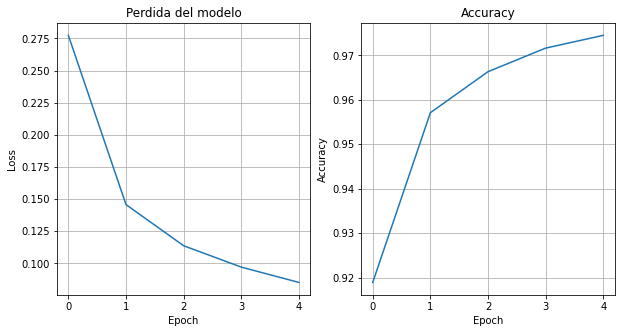

In [ ]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.title("Perdida del modelo")
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid()
plt.plot(history.history['loss'])
plt.subplot(1,2,2)
plt.title("Accuracy")
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.grid()
plt.plot(history.history['accuracy'])
plt.show()

En el gráfico se observa que la perdida del modelo tiene un comportamiento esperado, dado que es decreciente y viceverza para la efectividad. Se observa que a partir de la epoca 2 el modelo alcanza un comportamiento ideal hasta llegar a la cuarta epoca.

## 4. Reduzca el volumen de datos al 0.05% (600 datos)

In [ ]:
x_train_red = (x_train)[0:600]
y_train_red = (y_train)[0:600]
x_test_red = (x_test)
y_test_red = (y_test)

In [ ]:
SGD_train_red = []
RMSprop_train_red = []
Adagrad_train_red = []
Adadelta_train_red = []
Adam_train_red = []
SGD_val_red = []
RMSprop_val_red = []
Adagrad_val_red = []
Adadelta_val_red = []
Adam_val_red = []

for my_optimizer in optimizers:
  for my_lr in learning_rates:
    model = tf.keras.models.Sequential([
      tf.keras.layers.Flatten(input_shape=(28, 28)),
      tf.keras.layers.Dense(128, activation='relu'),
      tf.keras.layers.Dropout(0.2),
      tf.keras.layers.Dense(10, activation='softmax')
    ])
    
    str_opt = "tf.keras.optimizers.{}(learning_rate={})".format(my_optimizer, my_lr)
    opt = eval(str_opt)
    model.compile(optimizer=opt,
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    model.fit(x_train_red, y_train_red, epochs=5)
    arr_str_t = "{}_train_red.append(model.history.history['accuracy'][-1])".format(my_optimizer)
    eval(arr_str_t)
    arr_str_v = "{}_val_red.append(model.evaluate(x_test_red,  y_test_red, verbose=2)[1])".format(my_optimizer)
    eval(arr_str_v)

Epoch 1/5
19/19 [==============================] - 0s 2ms/step - loss: 2.4000 - accuracy: 0.0933
Epoch 2/5
19/19 [==============================] - 0s 2ms/step - loss: 2.3802 - accuracy: 0.1017
Epoch 3/5
19/19 [==============================] - 0s 2ms/step - loss: 2.3572 - accuracy: 0.1217
Epoch 4/5
19/19 [==============================] - 0s 2ms/step - loss: 2.3274 - accuracy: 0.1133
Epoch 5/5
19/19 [==============================] - 0s 2ms/step - loss: 2.3010 - accuracy: 0.1350
313/313 - 1s - loss: 2.2980 - accuracy: 0.1220
Epoch 1/5
19/19 [==============================] - 0s 2ms/step - loss: 1.7537 - accuracy: 0.4967
Epoch 2/5
19/19 [==============================] - 0s 2ms/step - loss: 0.9537 - accuracy: 0.7867
Epoch 3/5
19/19 [==============================] - 0s 2ms/step - loss: 0.6525 - accuracy: 0.8400
Epoch 4/5
19/19 [==============================] - 0s 2ms/step - loss: 0.5410 - accuracy: 0.8650
Epoch 5/5
19/19 [==============================] - 0s 2ms/step - loss: 0.4524 - 

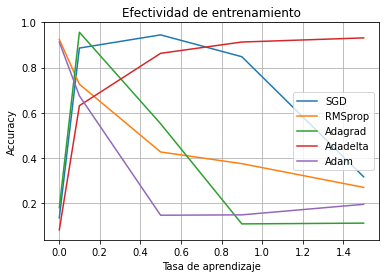

In [ ]:
plt.plot(learning_rates, SGD_train_red, label = "SGD")
plt.plot(learning_rates, RMSprop_train_red, label = "RMSprop")
plt.plot(learning_rates, Adagrad_train_red, label = "Adagrad")
plt.plot(learning_rates, Adadelta_train_red, label = "Adadelta")
plt.plot(learning_rates, Adam_train_red, label = "Adam")
plt.xlabel("Tasa de aprendizaje")
plt.ylabel("Accuracy")
plt.title("Efectividad de entrenamiento")
plt.grid()
plt.legend()
plt.show()

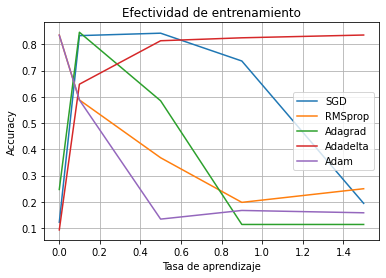

In [ ]:
plt.plot(learning_rates, SGD_val_red, label = "SGD")
plt.plot(learning_rates, RMSprop_val_red, label = "RMSprop")
plt.plot(learning_rates, Adagrad_val_red, label = "Adagrad")
plt.plot(learning_rates, Adadelta_val_red, label = "Adadelta")
plt.plot(learning_rates, Adam_val_red, label = "Adam")
plt.xlabel("Tasa de aprendizaje")
plt.ylabel("Accuracy")
plt.title("Efectividad de entrenamiento")
plt.grid()
plt.legend()
plt.show()

In [ ]:
pd.DataFrame({'Tasa de apredizaje':learning_rates, 'Accurracy Entrenamiento':Adadelta_train_red, 'Accuracy Validacion':Adadelta_val_red})

,Tasa de apredizaje,Accurracy Entrenamiento,Accuracy Validacion
0,0.001,0.081667,0.0927
1,0.100,0.631667,0.6481
2,0.500,0.863333,0.8138
3,0.900,0.913333,0.8250
4,1.500,0.931667,0.8356


A priori, los resultados observados graficamente, indican que reduciendo la muestra de entrenamient a un 0.05 equivalente a 600 registros es muy similar al modelo con la dataset de 10000, no obstante, se evidencia presencia de overfitting en el modelo, dado que en el set de validacion la accuracy es inferior a set de entrenamiento

## 5. responda las siguientes preguntas:

* ¿Cuál fue el método de optimización menos afectado por la reducción del conjunto de datos?

* ¿Cuál fue la tasa de aprendizaje menos afectada por la reducción del conjunto de datos?

* ¿Cuál fue el método que más rápido convergió?

### ¿Cuál fue el método de optimización menos afectado por la reducción del conjunto de datos?

In [ ]:
print('SGD:', abs(np.mean(SGD_val)-np.mean(SGD_val_red)))
print('RMSprop:', abs(np.mean(RMSprop_val)-np.mean(RMSprop_val_red)))
print('Adagrad:', abs(np.mean(Adagrad_val)-np.mean(Adagrad_val_red)))
print('Adadeltan:', abs(np.mean(Adadelta_val)-np.mean(Adadelta_val_red)))
print('Adam:', abs(np.mean(Adam_val)-np.mean(Adam_val_red)))

SGD: 0.2799400076270103
RMSprop: 0.011859998106956482
Adagrad: 0.3113800048828125
Adadeltan: 0.26230000406503684
Adam: 0.04164000600576401


El criterio para determinar el modelo menos afectado fue:

1. Hayar el promedio de accuracy para todos los modelos en las diferentes tasas de tasas de aprendizaje para los sets de validacion en la data de 10000 registros y la reducida con 600 registros
2. Hacer la diferencia entre medias de accuracy de los sets de validacion reducida y completa
3. Aquel que este mas cercano de cero implicará que tuvo una menor afectación por la reduccion de la base de datos.

A partir de la metodologia seleccionada se concluye que:

El modelos menos afectado es RMSprop, dado que la diferencia absoluta de medias de los accuracies, entre los set de validacion de la data completa y reducida da un 0.018.

### ¿Cuál fue la tasa de aprendizaje menos afectada por la reducción del conjunto de datos?

In [ ]:
var_SGD = np.round((np.array(SGD_val_red)-np.array(SGD_val))/np.array(SGD_val)*100,2)
var_RMSprop = np.round((np.array(RMSprop_val_red)-np.array(RMSprop_val))/np.array(RMSprop_val)*100,2)
var_Adagrad = np.round((np.array(Adagrad_val_red)-np.array(Adagrad_val))/np.array(Adagrad_val)*100,2)
var_Adadeltan = np.round((np.array(Adadelta_val_red)-np.array(Adadelta_val))/np.array(Adadelta_val)*100,2)
var_Adam = np.round((np.array(Adam_val_red)-np.array(Adam_val))/np.array(Adam_val)*100,2)

df=(pd.DataFrame({'Tasa de apredizaje':learning_rates, 
              'Variacon de tasa SGD':var_SGD, 
              'Variacon de tasa RMSprop':var_RMSprop,
              'Variacon de tasa Adagrad':var_Adagrad,
              'Variacon de tasa Adadelta':var_Adadeltan,
              'Variacon de tasa Adam':var_Adam}))
df

,Tasa de apredizaje,Variacon de tasa SGD,Variacon de tasa RMSprop,Variacon de tasa Adagrad,Variacon de tasa Adadelta,Variacon de tasa Adam
0,0.001,-86.16,-14.30,-72.55,-86.03,-14.52
1,0.100,-14.61,-24.79,-13.38,-31.30,46.38
2,0.500,-13.15,45.38,-38.79,-16.06,36.35
3,0.900,-22.57,6.69,-78.46,-15.31,69.61
4,1.500,-44.50,142.66,10.41,-14.41,60.41


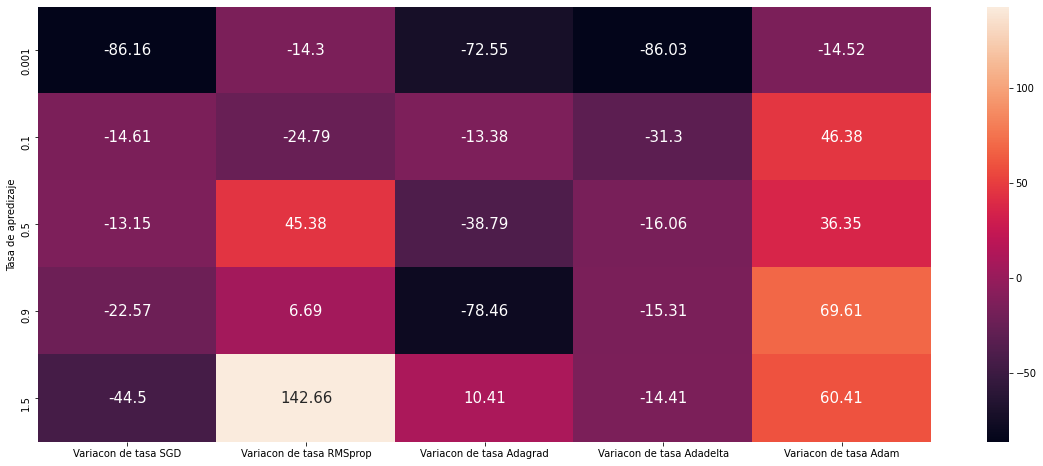

In [ ]:
plt.figure(figsize = (20,8))
sns.heatmap(df.set_index('Tasa de apredizaje'), annot=True, annot_kws={'fontsize':15}, fmt='')

Para determinar cual fue la tasa mas afectada por modelo se implementa una tasa de variación comparando los accuracies de los modelos en el set de validación, es decir, midiendo el cambio porcentual que tuvo el accuracy del set completo versus el set reducido y se concluye que la tasa mas afectada 
de aprendizaje fue **0.001** para el modelo SGD con una variación de **-87.8%**.

### ¿Cuál fue el método que más rápido convergió?

   Tasa de apredizaje     SGD  RMSprop  Adagrad  Adadelta    Adam
0               0.001  0.1220   0.8353   0.2469    0.0927  0.8351
1               0.100  0.8333   0.5882   0.8462    0.6481  0.5880
2               0.500  0.8426   0.3678   0.5850    0.8138  0.1339
3               0.900  0.7366   0.1977   0.1135    0.8250  0.1669
4               1.500  0.1939   0.2497   0.1135    0.8356  0.1580 



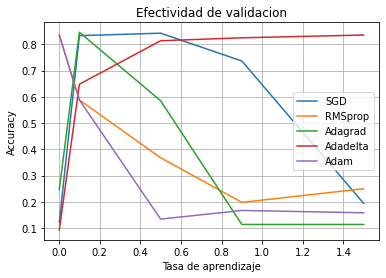

In [ ]:
print(pd.DataFrame({'Tasa de apredizaje':learning_rates, 
              'SGD':SGD_val_red, 
              'RMSprop':RMSprop_val_red,
              'Adagrad':Adagrad_val_red,
              'Adadelta':Adadelta_val_red,
              'Adam':Adam_val_red}), 
      '\n')
plt.plot(learning_rates, SGD_val_red, label = "SGD")
plt.plot(learning_rates, RMSprop_val_red, label = "RMSprop")
plt.plot(learning_rates, Adagrad_val_red, label = "Adagrad")
plt.plot(learning_rates, Adadelta_val_red, label = "Adadelta")
plt.plot(learning_rates, Adam_val_red, label = "Adam")
plt.xlabel("Tasa de aprendizaje")
plt.ylabel("Accuracy")
plt.title("Efectividad de validacion")
plt.grid()
plt.legend()
plt.show()

El modelo que mas rapido conve Adadelta, dado a que tasas mas altas alcanza mas pronto valores optimos de precisión y tardara menos tiempo en tener un desempeño alto en terminos de accuracy

## Conclusión general

El proceso realizado de seleccion de los diferentes optimizadores y tasas de aprendizaje resalta la importancia de como se debe buscar un modelo ideal para lograr el objetivo de un maximizacion del accuracy, minimización perdida y excelente desempeño en el set de testeo. 

A pesar que las tasas propuestas por el ejercicio fueron muy altas, se lograver que para la gran mayoria de modelos afecta fuertemente su desempeño, dado que lo usualmente recomendado es tener un aprendizaje que alcance un maximo de eficiencia de manera mas paulatina, asi de esta manera se puede garantizar que la red neuronal esta "aprendiendo" del set de entrenamiento. Para este ejercicoi se resalta que el optmizador Adadelta funciona muy bien a altas tasas de aprendixaje, lo que facilita su tiempo de procesamiento ya que converge rápidamente al objetivo planteado.

## Bibliografia 

* https://colab.research.google.com/drive/1SGQtk0i0EsbKDrY9WJrZf7dCsuIzC8uJ
* https://www.tensorflow.org/tutorials/quickstart/beginner
* https://keras.io/api/losses/ 
* https://machinelearningmastery.com/how-to-choose-loss-functions-when-training-deep-learning-neural-networks/
* https://keras.io/api/optimizers/adadelta/
